## This Notebook compares and analyses three ETFs (SPY, VOO and VGT)


In [3]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

plt.style.use("fivethirtyeight")

In [37]:
start_date = "2010-09-09"
end_date = datetime.today().strftime("%Y-%m-%d")

etfs = ["SPY", "VOO", "VGT"]
df_spy = pd.DataFrame(yf.download(tickers="spy", start=start_date, end=end_date))
df_voo = pd.DataFrame(yf.download(tickers="voo", start=start_date, end=end_date))
df_vgt = pd.DataFrame(yf.download(tickers="vgt", start=start_date, end=end_date))
df_voo

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-09,102.500000,102.500000,101.139999,101.320000,78.743347,26500
2010-09-10,101.680000,101.860001,101.300003,101.779999,79.100845,8600
2010-09-13,102.959999,103.139999,102.500000,103.059998,80.095642,33750
2010-09-14,102.839996,103.480003,102.379997,103.040001,80.080093,59400
2010-09-15,102.620003,103.379997,102.400002,103.300003,80.282204,9250
...,...,...,...,...,...,...
2024-01-09,433.619995,436.429993,433.160004,435.070007,435.070007,7939600
2024-01-10,435.769989,438.739990,435.480011,437.940002,437.940002,4278800
2024-01-11,438.940002,439.359985,434.000000,437.790009,437.790009,4796600


In [38]:
df = pd.DataFrame()
df["Date"] = df_spy.index
df["SPY"] = df_spy["Adj Close"].values
df["VOO"] = df_voo["Adj Close"].values
df["VGT"] = df_vgt["Adj Close"].values

df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df

,Date,SPY,VOO,VGT
2010-09-09,2010-09-09,86.035667,78.743347,45.472790
2010-09-10,2010-09-10,86.470039,79.100845,45.455280
2010-09-13,2010-09-13,87.431854,80.095642,46.444771
2010-09-14,2010-09-14,87.377556,80.080093,46.672436
2010-09-15,2010-09-15,87.711075,80.282204,46.900108
...,...,...,...,...
2024-01-09,2024-01-09,473.880005,435.070007,474.899994
2024-01-10,2024-01-10,476.559998,437.940002,478.929993
2024-01-11,2024-01-11,476.350006,437.790009,480.609985
2024-01-12,2024-01-12,476.679993,437.989990,481.679993


(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

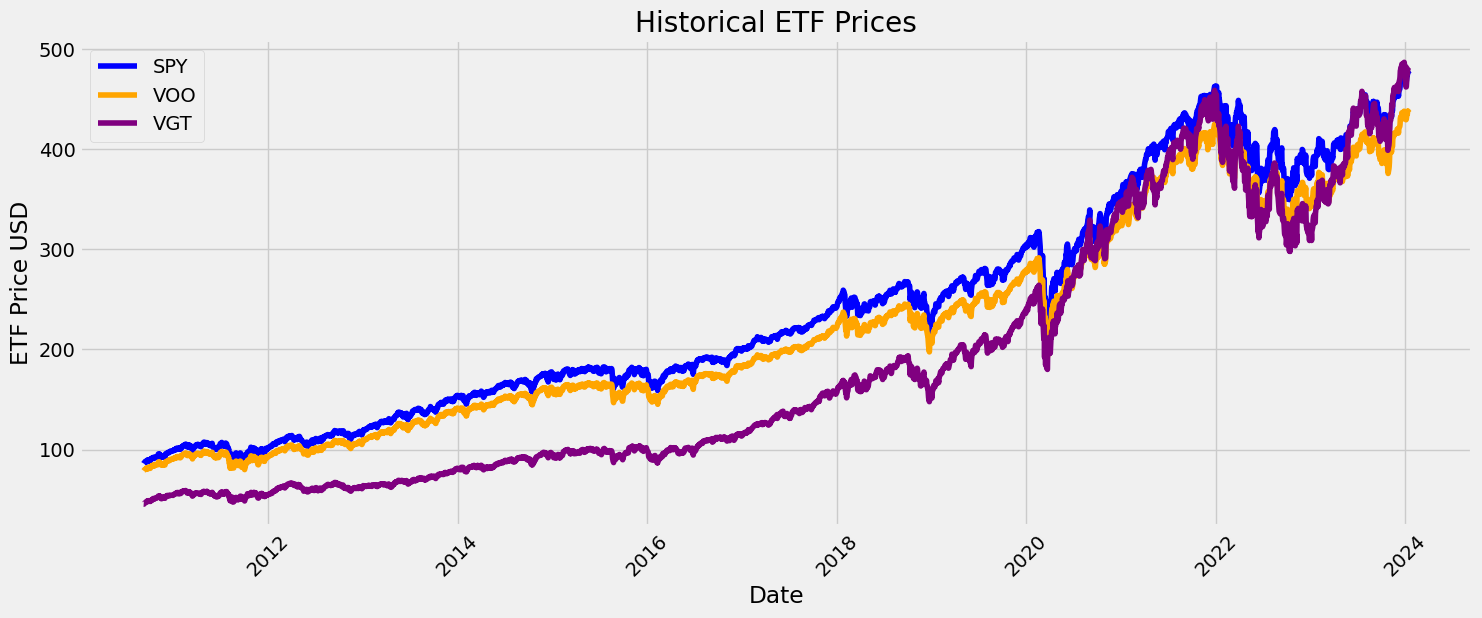

In [39]:
# Plot data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df["SPY"], label="SPY", color="blue")
plt.plot(df.index, df["VOO"], label="VOO", color="orange")
plt.plot(df.index, df["VGT"], label="VGT", color="purple")
plt.xlabel("Date")
plt.ylabel("ETF Price USD")
plt.legend()
plt.title("Historical ETF Prices")
plt.xticks(rotation=45)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

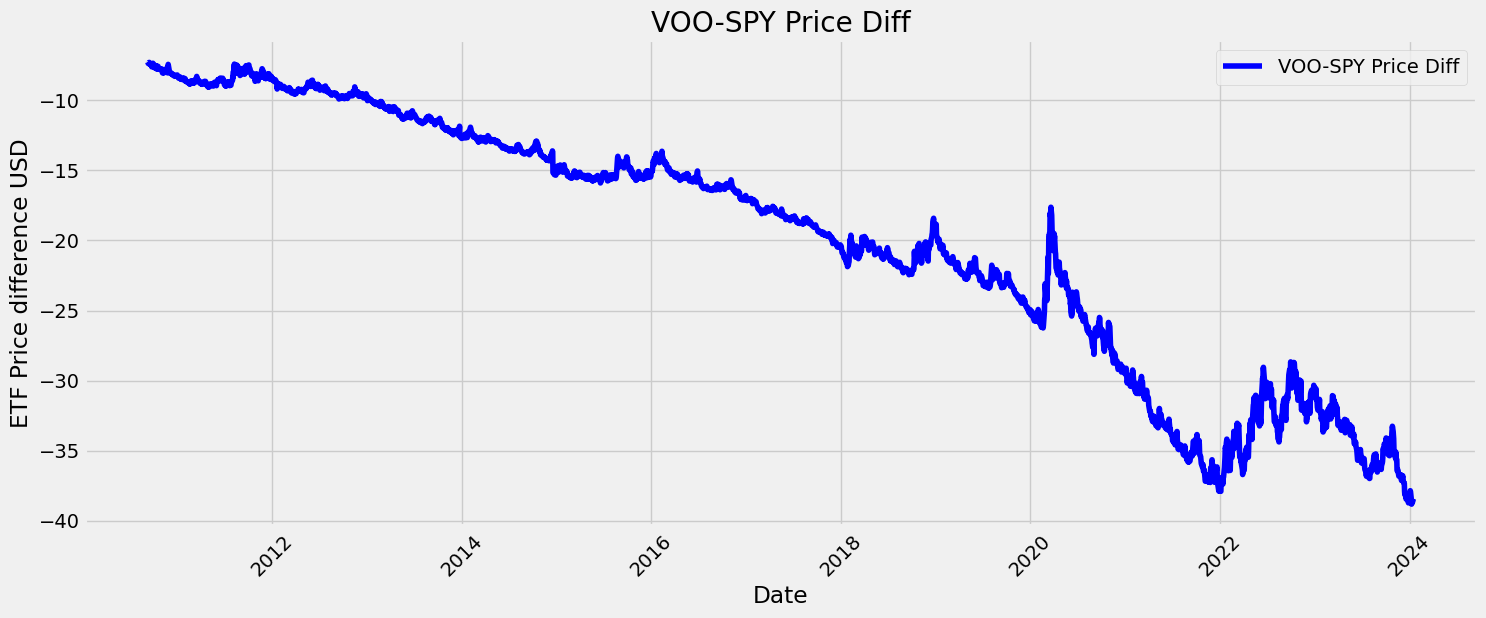

In [40]:
df["VOO-SPY Price Diff"] = df["VOO"] - df["SPY"]

# Plot data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df["VOO-SPY Price Diff"], label="VOO-SPY Price Diff", color="blue")

plt.xlabel("Date")
plt.ylabel("ETF Price difference USD")
plt.legend()
plt.title("VOO-SPY Price Diff")
plt.xticks(rotation=45)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

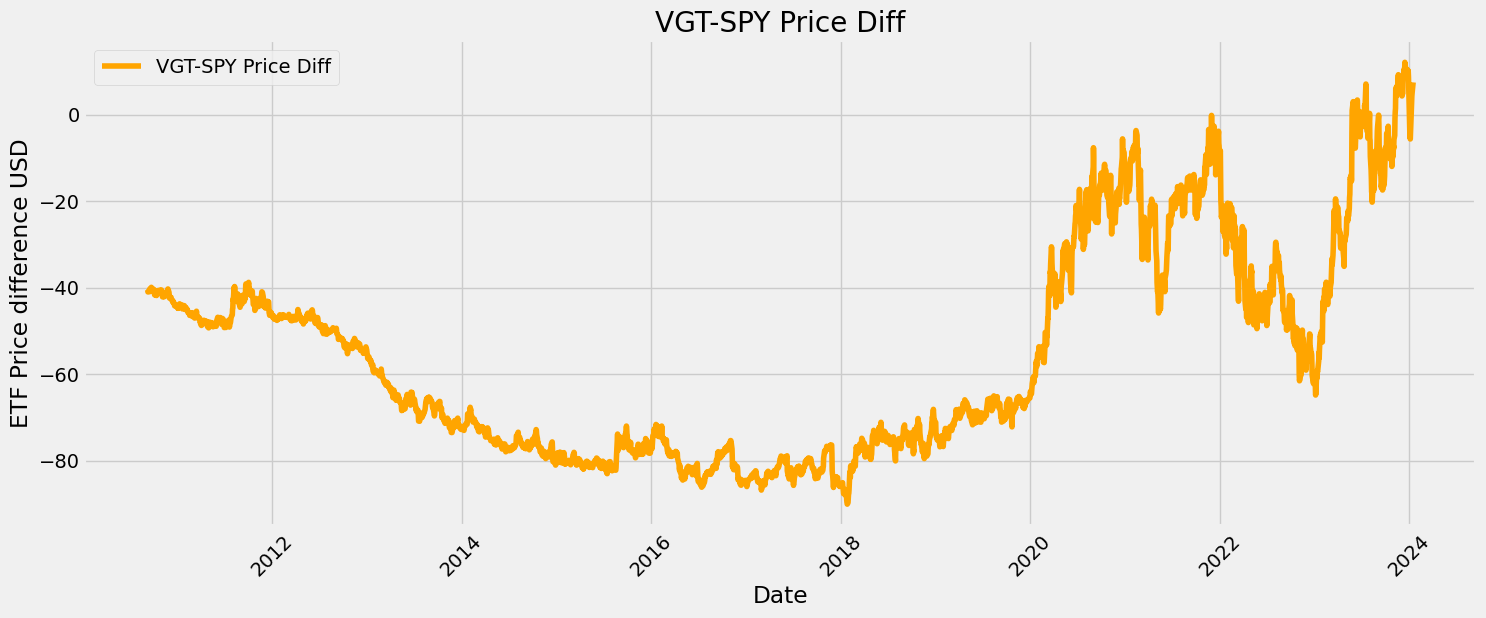

In [41]:
df["VGT-SPY Price Diff"] = df["VGT"] - df["SPY"]

# Plot data
plt.figure(figsize=(16, 6))
plt.plot(df.index, df["VGT-SPY Price Diff"], label="VGT-SPY Price Diff", color="orange")

plt.xlabel("Date")
plt.ylabel("ETF Price difference USD")
plt.legend()
plt.title("VGT-SPY Price Diff")
plt.xticks(rotation=45)

In [42]:
# Calculate the daily simple returns

daily_simple_returns = df[["SPY", "VOO", "VGT"]].pct_change()
daily_simple_returns

,SPY,VOO,VGT
2010-09-09,NaN,NaN,NaN
2010-09-10,0.005049,0.004540,-0.000385
2010-09-13,0.011123,0.012576,0.021768
2010-09-14,-0.000621,-0.000194,0.004902
2010-09-15,0.003817,0.002524,0.004878
...,...,...,...
2024-01-09,-0.001517,-0.002430,0.001772
2024-01-10,0.005655,0.006597,0.008486
2024-01-11,-0.000441,-0.000342,0.003508
2024-01-12,0.000693,0.000457,0.002226


<Axes: >

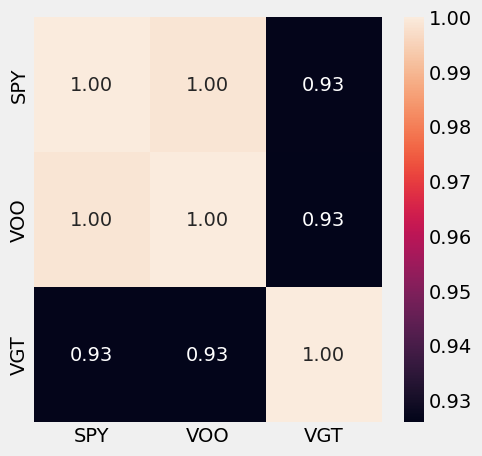

In [45]:
# Show the correlation between ETFs
plt.figure(figsize=(5, 5))
sns.heatmap(daily_simple_returns.corr(), annot=True, fmt=".2f")

In [47]:
# Show the co-variance matrix (tells how much the stocks move together)
# The diagonal of the covariance is the variance

daily_simple_returns.cov()

,SPY,VOO,VGT
SPY,0.000117,0.000118,0.000137
VOO,0.000118,0.000119,0.000138
VGT,0.000137,0.000138,0.000188


In [48]:
# Get variance
daily_simple_returns.var()

SPY    0.000117
VOO    0.000119
VGT    0.000188
dtype: float64

In [50]:
# Volatility, (how risky these assets are)

daily_simple_returns.std() * 100

SPY    1.080930
VOO    1.089547
VGT    1.372252
dtype: float64

In [52]:
# Get the daily mean simple returns
# On average what is the performance

daily_simple_returns.mean() * 100

SPY    0.056738
VOO    0.056956
VGT    0.079770
dtype: float64

In [54]:
# Average return per year, annualized returns

daily_simple_returns.mean() * 100 * 252

SPY    14.297963
VOO    14.352878
VGT    20.101989
dtype: float64